# Polynomial models

To begin our discussion of non-linear models, let's look at polynomial models. A polynomial model of degree **d** has the following form:

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 +  ... + \beta_d X^d$

*where X represents a feature, and its polynomials are also included as features in the model.*

We can choose the degree **(d)** of the model to capture particular types of trends. For example, if we observed some type of exponential growth in the model, we might choose a quadratic model (degree 2). If we were to look at a scatter plot of the households to total_rooms columns in the housing dataset, we'll find a non-linear trend:


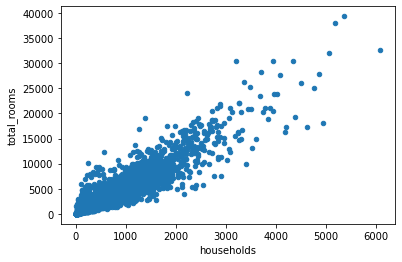

## Polynomials in SKLearn

In scikit-learn, there isn't an implementation for a polynomial model, but there is a helper class for generating polynomial features. This class is the `PolynomialFeatures` class in the `preprocessing` module.

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_X_train = poly.fit_transform(X_train)

First, the `PolynomialFeatures` class needs to be imported and used to instantiate an object. When we create the object, we need to define how many degrees we would like to generate via the `degree` parameter.

Above, we're creating an object that will generate the linear, quadratic, and cubic transformations of the features in X.

The Boolean `include_bias `parameter controls whether or not to include a column for the intercept. Since we don't need this when fitting our model becauce it passes through the origin, we've set `include_bias` to `False` here to exclude it and ensure our plot passes through (0, 0).

Now we can **fit** the `PolynomialFeatures` instance to the training data and (separately) **transform** it.

This is done using the `fit_transform()` method, which combines the `fit`() and `transform`() methods into one. The `fit`() method is **where the `PolynomialFeatures` object learns the number of features** in the input data (which it needs to generate the correct number of polynomial and interaction terms), and the transform()method **applies the transformation** to the data based on this "fitting."

Finally, we use the `transform()` method to apply the same polynomial transformation to the **test data **using the PolynomialFeatures instance that was used to fit and transform the training data.

    poly_X_test = poly.transform(X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

housing = pd.read_csv("housing.csv").dropna()

X = housing['households']
#reshape to array 1D
X= X.values.reshape(-1,1)

y=housing['total_rooms']

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=763)

#polynomial object
poly = PolynomialFeatures(degree=2, include_bias=False)

#train set
quad_X_train = poly.fit_transform(X_train)

#test set
quad_X_test = poly.fit_transform(X_test)

print(quad_X_train[:5])
print(X_train[:5])

# Fitting the Polynomial Model

If we examine the first elements of `quad_X_train` and `X_train`, we see the following:

    print(quad_X_train[0])
    print(X_train[0])

    [78, 6084]
    [78]

For `quad_X_train`, we get a list with two values, which corresponds to the first row of the transformed households column.

1. The first element corresponds to the original X_train data we called fit_transform() on.
2. the last element contains the quadratic transformation of the households column, and we can confirm this by checking that 78 * 78 = 6084.

Now we can use these transformed features to fit our polynomial model using the `LinearRegression` class. Remember that a polynomial model still has a linear nature, but it's the features that have been converted into a non-linear form.

Using the transformed quad_X_train data, our model would look like the following: $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

What we'd like to highlight here is that the regression coefficients gain new interpretations in the context of a polynomial model. Each of the non-intercept coefficients captures the strength of a different trend. $\beta_1$ corresponds to the strength of the linear trend, while $\beta_2$ corresponds to the strength of the quadratic trends. The intercept $\beta_0$ represents the average value of the outcome when the feature is 0.

$\epsilon$ still captures the error of the model not captured by the features.
Assumptions:

  1. If there's truly a quadratic trend in the data, then ideally the addition of the quadratic term will further **reduce the MSE**.

  1. If not, then we will see that this quadratic term won't contribute to or could even adversely affect predictive ability.

To check this, it's best to compare polynomial models to their linear forms to check if these more complex predictors are justified.

In [ ]:
#Let's compare a purely linear model with a quadratic model in terms of predictive performance.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2, include_bias=False)

housing = pd.read_csv("housing.csv").dropna()
X = housing["households"].values.reshape(-1, 1)
y = housing["total_rooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=763)

quad_X_train = poly.fit_transform(X_train)
quad_X_test = poly.transform(X_test)


#create 2 LinearRegression objects
linear = LinearRegression()
quadratic = LinearRegression()

#fit linear with data not transformed
linear.fit(X_train,y_train)

#fit quadratic with transformed data
quadratic = quadratic.fit(quad_X_train,y_train)

#calculate mse for both models
linear_mse = mean_squared_error(y_test,linear.predict(X_test))

quadratic_mse = mean_squared_error(y_test,quadratic.predict(quad_X_test))

better_model = "quadratic"

#Piecewise function

the inclusion of polynomial terms comes at the cost of **terrible extrapolations** — predictions made using feature values outside the range of the training data. As we venture farther from the range of the data, polynomial model predictions grow extremely fast, going outside of any realistic value we might observe.

If we were to fit a quadratic model on this data, the resulting model would predict higher values than expected of total_rooms for households values past 7000. One way around this is to **use different models to describe different domains** (input ranges) of the feature column. For example, instead of having a single quadratic model for the entire range of households values, we could use two linear models with a knot that separates the domains of the two models. We show this visually below:

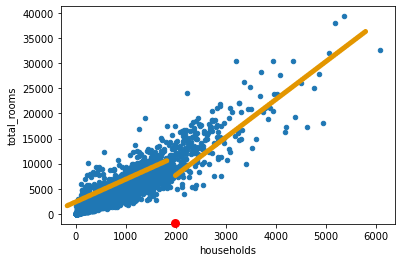

There are **two linear models above**,

1. one fits for `households < 2000` and

1. one fits for `households > 2000`.

There is a single knot, denoted by the red dot, that describes the point where the model changes, going from one slope and intercept to another. This is an example of a **piecewise function.**

We choose one of the models to cover the prediction at 2000 to prevent it from having two predictions at the same point. The full piecewise model is described by both of these models. The value 2000 was chosen because there's visual evidence that the slope changes around this point, but it can also be in other places where the trend seems to change significantly. We have just indicated it here for demonstration purposes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

housing = pd.read_csv("housing.csv").dropna()
X = housing["households"].values.reshape(-1, 1)
y = housing["total_rooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=763)

# Subdividing the data into different domains
train_lt_2000 = X_train < 2000
train_gte_2000 = X_train >= 2000
test_lt_2000 = X_test < 2000
test_gte_2000 = X_test >= 2000

X_train_lt_2000 = X_train[train_lt_2000].reshape(-1, 1)
X_train_gte_2000 = X_train[train_gte_2000].reshape(-1, 1)
X_test_lt_2000 = X_test[test_lt_2000].reshape(-1, 1)
X_test_gte_2000 = X_test[test_gte_2000].reshape(-1, 1)

y_train_lt_2000 = y_train.loc[train_lt_2000]
y_train_gte_2000 = y_train.loc[train_gte_2000]
y_test_lt_2000 = y_test.loc[test_lt_2000]
y_test_gte_2000 = y_test.loc[test_gte_2000]

# Training the models
lm = LinearRegression().fit(X_train, y_train)

pre2000 = LinearRegression().fit(X_train_lt_2000, y_train_lt_2000)

post2000 = LinearRegression().fit(X_train_gte_2000, y_train_gte_2000)

#Predictions
pred_standard_lm = lm.predict(X_test)

test_predictions_lt_2000 = pre2000.predict(X_test_lt_2000)

test_predictions_gte_2000 = post2000.predict(X_test_gte_2000)

#combine dataset
piecewise_test_predictions = np.concatenate((test_predictions_lt_2000, test_predictions_gte_2000))

y_test_recombined = np.concatenate((y_test_lt_2000, y_test_gte_2000))


#mse
standard_lm_test_mse = mean_squared_error(y_test,pred_standard_lm)

piecewise_test_mse = mean_squared_error(y_test_recombined,piecewise_test_predictions)

better_model = "piecewise"






One of the weaknesses of piecewise functions is that they produce **discontinuities**, places where the function will suddenly change in value. In our example, the discontinuity happens at the knot:

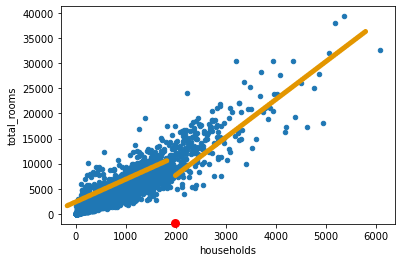


#Creating Splines
Typically, we'd want our predictive model to be **continuous** instead. We won't explore the mathematical sense of continuity, but we can understand a continuous function as one that forms an uninterrupted line without any gaps or breaks. We can add additional **constraints**, or restrictions, on piecewise functions so that they will be continuous. Placing a continuity constraint on our example function would force it to look like this:

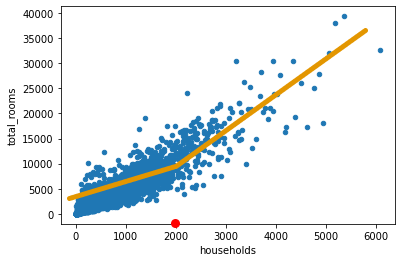

We can see that the function is now continuous at the knot. However, you may also notice that there is now a sharp "elbow" in the function. We also might want our predictive model to be smooth, without this sharp point. We can do this by **placing two more constraints** on the function: that both the first and second derivative are continuous at the knot. Imposing these constraints results in a model that roughly looks like this:

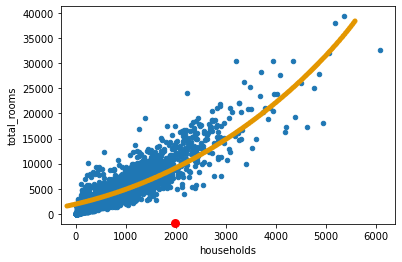

##Spline in SKLearn

The final product above is still a piecewise polynomial, but it has **three additional constraints** to force it to be continuous and smooth. This model has a special name: a spline. Splines are extremely flexible models that we can use to model complex feature-outcome relationships. They require more mathematical detail, but thankfully, we can abstract this away using some functionality in `scikit-learn.`

We can create splines using the `SplineTransformer` class. The `SplineTransformer` class has a similar interface as `PolynomialFeatures`:

    from sklearn.preprocessing import SplineTransformer
    spline = SplineTransformer(degree=1, n_knots=2, knots="uniform")
    spline.fit_transform(X_train)

* `degree`: defines the degree of the polynomials that we would like to use in the spline. This value must be a non-negative integer.
  
* `n_knots`: defines how many knots to place in the model. This value must be greater than or equal to 2.
  
* `knots`: describes where the knots should be placed. Although we can specify the locations of the knots ourselves, it's often better to have them dispersed uniformly over the values of the feature. By default, SplineTransfomer uses `knots="uniform"`.

The `fit_transform()` is a method that first fits the model to the data and then transforms the data according to the fitted model.

Let's break this down a bit:

1. `fit`: This step calculates the parameters needed to perform the transformation. In the case of `SplineTransformer`, it determines the positions and values of the knots used for the spline fit, based on the input data `X_train`. In the example provided, the number of knots is set to 2 and their distribution is uniform (knots="uniform"), and the degree of the spline is set to 1.

1. `transform`: After the model has been fitted, this step then applies the transformation to the data. For `SplineTransformer`, this means applying the spline transformation, which is a type of piecewise polynomial interpolation. The result is that the training data `X_train` is transformed into a new dataset.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer

housing = pd.read_csv("housing.csv").dropna()
X = housing["households"].values.reshape(-1, 1)
y = housing["total_rooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=763)

spline = SplineTransformer(degree=1,n_knots=2,knots='uniform')

#spline transform X_train in a new dataset
spline_X_train = spline.fit_transform(X_train)

##Spline Analysis

The SplineTransformer class helps us create features that enable us to construct spline models, but **it doesn't actually create the model for us.**

If we were to examine the spline_X_train that we created on the previous screen, we would see the following output:

    spline = SplineTransformer(degree=1, n_knots=2)
    spline_X_train = spline.fit_transform(X_train)
    print(spline_X_train[:5])

    array([[0.98581031 0.01418969],
          [0.8877894  0.1122106 ],
          [0.9512696  0.0487304 ],
          [0.92176998 0.07823002],
          [0.93147872 0.06852128]])


The result is an array of lists, similar to how `PolynomialFeatures` transforms the data. We know that `PolynomialFeatures` produces features based off the different powers of the feature, but what transformation does `SplineTransformer` use?

To understand this, we need to understand the **spline basis representation**.

#Basis Expansion

The spline basis representation represents the spline as a linear combination of functions of features. For example, if we were using two functions, **b_1(X)** and  **b_2(X)** , to construct the spline, the model would be written like this:

$Y = \beta_0 + \beta_1 b_1(X) + \beta_2 b_2(X) + \epsilon$




Polynomial regression uses powers of the features as the functions:
$b_1(X) = X$ and $b_2(X) = X^2$

These $b_i(X) = X$ functions have a special name: **basis functions.** In standard linear regression, the basis functions are just the features themselves. The intercept **b0** and $\epsilon$ have similar interpretations to the other linear regressions we've seen in this lesson.

Let's say that we want to use polynomials of degree **d** in the model, and we want to use **k** knots. It turns out that just by specifying these two pieces of information, we can completely describe the resulting spline with **d+k-1**  basis functions. In our example above for spline, we specified **d=1** and **k=2**, so we would need **two basis functions to describe the spline**.

This is exactly what we see in the output above! The `SplineTransformer` class calculates the values of each of the basis functions for us.

When preprocessing our data for machine learning models, we want to ensure that the same transformations are applied to both our training and test data. This means that any parameters estimated during fitting should be based on the training data only, and then these same transformations should be applied to the test data by calling `transform`() on the same spline object when passing it the test data

    spline = SplineTransformer(degree=1, n_knots=2, knots="uniform")
    spline_X_train = spline.fit_transform(X_train)
    spline_X_test = spline.transform(X_test)

One weakness of this approach is that we won't know the explicit form of the basis functions. However, the only thing we need to create the spline is the **output of these basis functions**, and this is what SplineTransformer provides.

In order to estimate the coefficients, we just need to pass these transformed features into a `LinearRegression`() object.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

housing = pd.read_csv("housing.csv").dropna()
X = housing["households"].values.reshape(-1, 1)
y = housing["total_rooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=763)

spline = SplineTransformer(degree=1, n_knots=2)
spline_X_train = spline.fit_transform(X_train)

model = LinearRegression()

#fit the model with spline train data
model.fit(spline_X_train,y_train)

#transforme test dataset with the same SplineTransformer
spline_X_test = spline.transform(X_test)

#mse with spline dataset
spline_mse = mean_squared_error(y_test,model.predict(spline_X_test))


#Cubic Splines

Creating a general rule. Splines give us **two parameters** to construct a model:
1. the degree of the polynomial

1. the number of knots.

Practically speaking, higher-degree polynomials are too flexible and are prone to overfitting. Instead of increasing the degree of the spline, it would be good to stick to a simpler polynomial and then experiment with the number of knots via cross-validation.

Specifically, cubic splines (d=3) are popular because they hide the knots in the function well. We recommend sticking to cubic splines unless some expert knowledge or data exploration suggests strongly otherwise. In fact, the **default** argument for the SplineTransformer class is to use a cubic spline (degree=3).

With this in mind, let's practice trying to optimize for the best number of knots to use for our spline model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

housing = pd.read_csv("housing.csv").dropna()
X = housing["households"].values.reshape(-1, 1)
y = housing["total_rooms"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=763)

test_mses = []
min_mse = 10000000

for i in range(2,11):
    #incrementing the number of knots
    spline = SplineTransformer(n_knots=i)

    #fit train and test dataset
    spline_X_train = spline.fit_transform(X_train)

    spline_X_test= spline.transform(X_test)

    #create linear regression
    lm = LinearRegression().fit(spline_X_train,y_train)

    #evaluate mse
    mse = mean_squared_error(y_test,lm.predict(spline_X_test))

    #optimal_knots
    if mse < min_mse:
        optimal_knots = i
        min_mse = mse

    #append mse
    test_mses.append(round(mse))



